# Analysing Tartu Smart Bike usage data 2019-2021

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
data2019 = pd.read_csv("2019.csv", sep=',', header=0)
print("2019: ",data2019.shape)
data2020 = pd.read_csv("2020.csv", sep=',', header=0)
print("2020: ",data2020.shape)
data2021 = pd.read_csv("2021.csv", sep=',', header=0)
print("2021: ",data2021.shape)

2019:  (742559, 12)
2020:  (874032, 12)
2021:  (85004, 12)


In [102]:
#data2019 = data2019.drop(columns=['startstationserialnumber','endstationserialnumber'])
# Eemalda peatused.
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Warehouse') | (data2019.endstationname == 'Warehouse')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Lauluväljak') | (data2019.endstationname == 'Lauluväljak')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'SPARK Demo') | (data2019.endstationname == 'SPARK Demo')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Töökoda') | (data2019.endstationname == 'Töökoda')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Tour d'ÖÖ") | (data2019.endstationname == "Tour d'ÖÖ")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "-- Määramata --") | (data2019.endstationname == "-- Määramata --")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Metallica parkla") | (data2019.endstationname == "Metallica parkla")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Undetermined") | (data2019.endstationname == "Undetermined")].index)
# Eemalda sõidud alla 50m.
data2019 = data2019.drop(data2019[data2019['length'] < 0.05].index)
# Eemalda sõidud pikkusega 0m.
data2019 = data2019.drop(data2019[data2019.length == 0].index)

#data2019[['yearOfBirth', 'first3IdNumber']] - vali mitu tulpa korraga

data2019['first3IdNumber'] = data2019['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].str[:-2]
data2019['yearOfBirth'] = data2019['yearOfBirth'].replace('n', '000')



# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2019 = data2019.drop(data2019[data2019['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2019 = data2019.drop(data2019[~data2019['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
data2019 = data2019.drop(data2019[data2019['first3IdNumber'] == '3ü1'].index)

# ID-kaardi põhjal sünniaasta genereerimine
data2019.loc[((data2019['first3IdNumber'].str[0] == '1') | (data2019['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '3') | (data2019['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '5') | (data2019['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2019['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2019[['yearOfBirth', 'first3IdNumber']].loc[(data2019['yearOfBirth'].str[2:4] != data2019['first3IdNumber'].str[1:]) & ((data2019['yearOfBirth'].str[:3] != '000') & (data2019['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2019[['yearOfBirth', 'first3IdNumber']].loc[(data2019['yearOfBirth'].str[:3] == '000') & (data2019['first3IdNumber'] != 'NaN')]


,yearOfBirth,first3IdNumber


<BarContainer object of 24 artists>

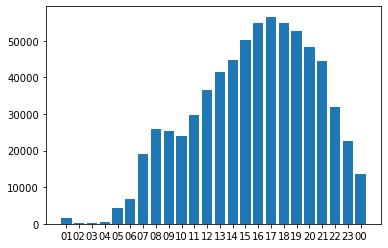

In [103]:
#data2019 = data2019.drop(columns=['startstationserialnumber','endstationserialnumber'])
# Algab 00:00 - 01:00 kuni 23:00 - 00:00, liigutakse 1-tunnise astmega.
kellaajadLahti19Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2019.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti19Dict[row['unlockedattime'][:2]] = kellaajadLahti19Dict[row['unlockedattime'][:2]] + 1
keysLahti19 = list(kellaajadLahti19Dict.keys())
valuesLahti19 = list(kellaajadLahti19Dict.values())

plt.bar(keysLahti19, valuesLahti19)

In [30]:
kellaajadKinni19Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2019.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni19Dict[row['lockedattime'][:2]] = kellaajadKinni19Dict[row['lockedattime'][:2]] + 1
keysKinni19 = list(kellaajadKinni19Dict.keys())
valuesKinni19 = list(kellaajadKinni19Dict.values())

plt.bar(keysKinni19, valuesKinni19, color="red")

{'01': 4765,
 '02': 819,
 '03': 278,
 '04': 366,
 '05': 3527,
 '06': 6069,
 '07': 16579,
 '08': 25301,
 '09': 24564,
 '10': 23204,
 '11': 26381,
 '12': 34510,
 '13': 39649,
 '14': 43640,
 '15': 48675,
 '16': 53879,
 '17': 56779,
 '18': 54675,
 '19': 52534,
 '20': 49438,
 '21': 46806,
 '22': 36027,
 '23': 25582,
 '00': 16875}

<BarContainer object of 24 artists>

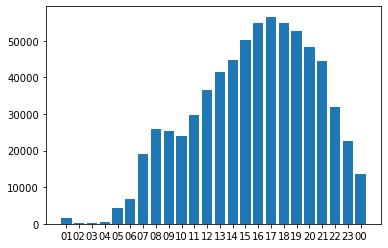

<BarContainer object of 24 artists>

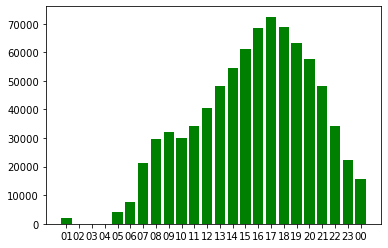

In [108]:
kellaajadLahti20Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}

for index, row in data2020.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti20Dict[row['unlockedattime'][:2]] = kellaajadLahti20Dict[row['unlockedattime'][:2]] + 1

keysLahti20 = list(kellaajadLahti20Dict.keys())
valuesLahti20 = list(kellaajadLahti20Dict.values())

plt.bar(keysLahti20, valuesLahti20, color="green")

In [47]:
kellaajadKinni20Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2020.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni20Dict[row['lockedattime'][:2]] = kellaajadKinni20Dict[row['lockedattime'][:2]] + 1

keysKinni20 = kellaajadKinni20Dict.keys()
valuesKinni20 = kellaajadKinni20Dict.values()

plt.bar(keysKinni20, valuesKinni20, color="green")

<BarContainer object of 24 artists>

Error in callback <function flush_figures at 0x000002C39BFE1430> (for post_execute):


KeyboardInterrupt: 

<BarContainer object of 24 artists>

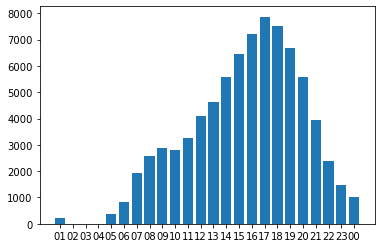

In [110]:
kellaajadLahti21Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}

for index, row in data2021.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti21Dict[row['unlockedattime'][:2]] = kellaajadLahti21Dict[row['unlockedattime'][:2]] + 1

keysLahti21 = list(kellaajadLahti21Dict.keys())
valuesLahti21 = list(kellaajadLahti21Dict.values())

plt.bar(keysLahti21, valuesLahti21)

<BarContainer object of 24 artists>

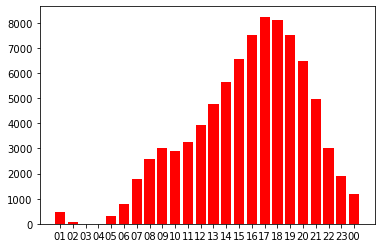

In [48]:
kellaajadKinni21Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2021.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni21Dict[row['lockedattime'][:2]] = kellaajadKinni21Dict[row['lockedattime'][:2]] + 1

keysKinni21 = kellaajadKinni21Dict.keys()
valuesKinni21 = kellaajadKinni21Dict.values()

plt.bar(keysKinni21, valuesKinni21, color="red")

In [111]:
valuesLahti21

[222,
 2,
 0,
 0,
 367,
 816,
 1931,
 2571,
 2882,
 2820,
 3252,
 4110,
 4637,
 5573,
 6462,
 7219,
 7872,
 7528,
 6664,
 5595,
 3959,
 2390,
 1490,
 1002]

<ipython-input-115-9ffb975b30f6>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


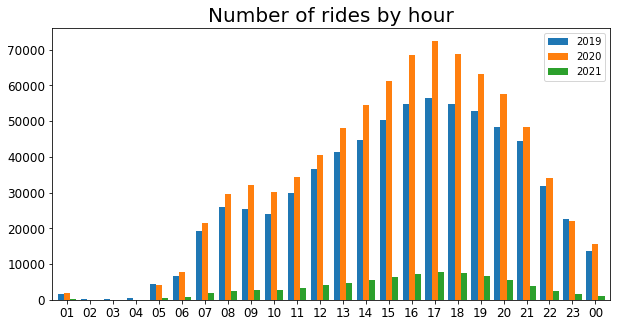

In [115]:
yearsWithUsageByHour = {
   '2019': [1491,353,123,408,4344,6719,19163,25909,25449,24031,29828,36666,41502,44755,50193,54758,56609,54908,52733,48409,44427,31820,22687,13637],
   '2020': [1961,1,0,0,4274,7721,21389,29493,32189,30138,34351,40504,48197,54535,61217,68621,72443,68722,63187,57642,48341,34186,22159,15666],
   '2021': [222,2,0,0,367,816,1931,2571,2882,2820,3252,4110,4637,5573,6462,7219,7872,7528,6664,5595,3959,2390,1490,1002],
   'Hours': ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']
}
dfYearsWithUsageByHour = pd.DataFrame(yearsWithUsageByHour)
ax = dfYearsWithUsageByHour.plot(x='Hours',kind='bar', title="Number of rides by hour", fontsize='large',figsize=(10,5), width=0.8)
ax.tick_params(axis='x', rotation=0)

ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('Weeks')
x_axis.label.set_visible(False)
ax1.title.set_size(20)

In [106]:
#data2020 = data2020.drop(columns=['startstationserialnumber','endstationserialnumber'])
data2020 = data2020.drop(data2020[(data2020.startstationname == '-- Määramata --') | (data2020.endstationname == '-- Määramata --')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Rahu 8') | (data2020.endstationname == 'Rahu 8')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'SPARK Demo') | (data2020.endstationname == 'SPARK Demo')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Töökoda') | (data2020.endstationname == 'Töökoda')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Undetermined') | (data2020.endstationname == 'Undetermined')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Ihaste Päev') | (data2020.endstationname == 'Ihaste Päev')].index)
data2020 = data2020.drop(data2020[data2020['length'] < 0.05].index)
data2020 = data2020.drop(data2020[data2020.length == 0].index)

data2020['first3IdNumber'] = data2020['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].str[:-2]
data2020['yearOfBirth'] = data2020['yearOfBirth'].replace('n', '000')

# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2020 = data2020.drop(data2020[data2020['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2020 = data2020.drop(data2020[~data2020['first3IdNumber'].str[0].isin(synNr)].index)

data2020.loc[((data2020['first3IdNumber'].str[0] == '1') | (data2020['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '3') | (data2020['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '5') | (data2020['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2020['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2020[['yearOfBirth', 'first3IdNumber']].loc[(data2020['yearOfBirth'].str[2:4] != data2020['first3IdNumber'].str[1:]) & ((data2020['yearOfBirth'].str[:3] != '000') & (data2020['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2020[['yearOfBirth', 'first3IdNumber']].loc[(data2020['yearOfBirth'].str[:3] == '000') & (data2020['first3IdNumber'] != 'NaN')]

#data2020[['yearOfBirth', 'first3IdNumber']]
#data2020['first3IdNumber'].unique()

,yearOfBirth,first3IdNumber


In [107]:
#data2021 = data2021.drop(columns=['startstationserialnumber','endstationserialnumber'])
data2021 = data2021.drop(data2021[(data2021.startstationname == 'SPARK Demo') | (data2021.endstationname == 'SPARK Demo')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == '-- Määramata --') | (data2021.endstationname == '-- Määramata --')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Töökoda') | (data2021.endstationname == 'Töökoda')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Undetermined') | (data2021.endstationname == 'Undetermined')].index)
data2021 = data2021.drop(data2021[data2021['length'] < 0.05].index)
data2021 = data2021.drop(data2021[data2021.length == 0].index)

data2021['first3IdNumber'] = data2021['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].str[:-2]
data2021['yearOfBirth'] = data2021['yearOfBirth'].replace('n', '000')

# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2021 = data2021.drop(data2021[data2021['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2021 = data2021.drop(data2021[~data2021['first3IdNumber'].str[0].isin(synNr)].index)

data2021.loc[((data2021['first3IdNumber'].str[0] == '1') | (data2021['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '3') | (data2021['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '5') | (data2021['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2021['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2021[['yearOfBirth', 'first3IdNumber']].loc[(data2021['yearOfBirth'].str[2:4] != data2021['first3IdNumber'].str[1:]) & ((data2021['yearOfBirth'].str[:3] != '000') & (data2021['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2021[['yearOfBirth', 'first3IdNumber']].loc[(data2021['yearOfBirth'].str[:3] == '000') & (data2021['first3IdNumber'] != 'NaN')]

#data2021[['yearOfBirth', 'first3IdNumber']]
#data2021['first3IdNumber'].unique()



,yearOfBirth,first3IdNumber


In [70]:
#andmed19end = dict(data2019['endstationname'].value_counts())

vanused = {"0-18":0,"19-25":0,"26-30":0,"31-40":0,"41-50":0,"51-65":0,"66+":0}
mas = {0}
for index, row in data2019.iterrows():
    vanus = 2021 - int(row['yearOfBirth'])
    if(vanus != 2021):
        mas.add(vanus)
        if (vanus <= 18):
            vanused["0-18"] = vanused["0-18"] + 1
        elif (18 < vanus <= 25):
            vanused["19-25"] = vanused["19-25"] + 1
        elif (26 < vanus <= 30):
            vanused["26-30"] = vanused["26-30"] + 1
        elif (31 < vanus <= 40):
            vanused["31-40"] = vanused["31-40"] + 1
        elif (41 < vanus <= 50):
            vanused["41-50"] = vanused["41-50"] + 1
        elif (50 < vanus <= 65):
            vanused["51-65"] = vanused["51-65"] + 1
        else:
            vanused["66+"] = vanused["66+"] + 1
    
#data2019.loc[data2019['yearOfBirth'] != "000"].value_counts()
vanused

{'0-18': 59885,
 '19-25': 182819,
 '26-30': 66626,
 '31-40': 88138,
 '41-50': 48809,
 '51-65': 33234,
 '66+': 50655}

In [93]:
# Eemalda ebavajalikud sünniaastad, jääb alles vahemik 1921-2003 - 2019. aasta põhjal
data2019 = data2019.drop(data2019[((data2019['yearOfBirth'].astype(int) < 1921) | (2003 < data2019['yearOfBirth'].astype(int))) & (data2019['yearOfBirth'] != "000")].index)
# Testimine
data2019['yearOfBirth'].loc[(data2019['yearOfBirth'].astype(int) >= 2000) & (data2019['yearOfBirth'].astype(int) <= 2100) & (data2019['yearOfBirth'] != "000")].unique()

data2019['yearOfBirth'].unique()

array(['000', '1995', '1981', '1982', '1983', '2002', '1976', '2001',
       '1999', '1992', '1997', '1990', '1998', '1996', '2000', '1993',
       '1988', '1991', '1977', '1994', '1950', '1940', '1975', '1967',
       '1971', '1960', '1972', '1961', '1953', '1980', '1978', '2003',
       '1969', '1973', '1952', '1979', '1965', '1957', '1948', '1986',
       '1984', '1989', '1985', '1946', '1962', '1966', '1954', '1964',
       '1956', '1947', '1987', '1970', '1951', '1958', '1968', '1938',
       '1963', '1974', '1959', '1937', '1945', '1955', '1949', '1941',
       '1942', '1943', '1944', '1936', '1939', '1924', '1928', '1931'],
      dtype=object)

<BarContainer object of 7 artists>

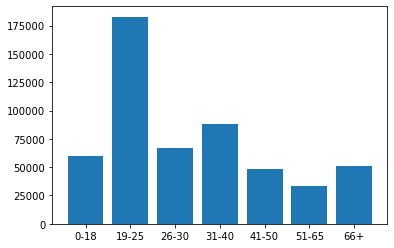

In [66]:
keysVanused = vanused.keys()
valuesVanused = vanused.values()

plt.bar(keysVanused, valuesVanused)

In [ ]:
# Eemaldada ebavajalikud sünniaastad, jääb alles vahemik 1921-2003 - 2019. aasta põhjal
data2019 = data2019.drop(data2019[((data2019['yearOfBirth'].astype(int) < 1921) | (2003 < data2019['yearOfBirth'].astype(int))) & (data2019['yearOfBirth'] != "000")].index)
# Testimine
data2019['yearOfBirth'].loc[(data2019['yearOfBirth'].astype(int) >= 2000) & (data2019['yearOfBirth'].astype(int) <= 2100) & (data2019['yearOfBirth'] != "000")].unique()

vanused = {"0-18":0,"19-25":0,"26-30":0,"31-40":0,"41-50":0,"51-65":0,"66+":0}
for index, row in data2019.iterrows():
    vanus = 2021 - int(row['yearOfBirth'])
    if(vanus != 2021):
        if (vanus <= 18):
            vanused["0-18"] = vanused["0-18"] + 1
        elif (18 < vanus <= 25):
            vanused["19-25"] = vanused["19-25"] + 1
        elif (26 < vanus <= 30):
            vanused["26-30"] = vanused["26-30"] + 1
        elif (31 < vanus <= 40):
            vanused["31-40"] = vanused["31-40"] + 1
        elif (41 < vanus <= 50):
            vanused["41-50"] = vanused["41-50"] + 1
        elif (50 < vanus <= 65):
            vanused["51-65"] = vanused["51-65"] + 1
        else:
            vanused["66+"] = vanused["66+"] + 1

keysVanused = vanused.keys()
valuesVanused = vanused.values()

plt.bar(keysVanused, valuesVanused)

In [7]:
# Faili salvestamine

data2019.to_csv('data19cha.csv', index=False)
data2020.to_csv('data20cha.csv', index=False)
data2021.to_csv('data21cha.csv', index=False)

In [89]:

data2019['unlockedat'] = pd.to_datetime(data2019['unlockedat'])
data2019['day_of_week'] = data2019['unlockedat'].dt.day_name()
#data2019['day_of_week'].astype(str)
data2019['unlockedat']

data2020['unlockedat'] = pd.to_datetime(data2020['unlockedat'])
data2020['day_of_week'] = data2020['unlockedat'].dt.day_name()
#data2019['day_of_week'].astype(str)
data2020['unlockedat']

data2021['unlockedat'] = pd.to_datetime(data2021['unlockedat'])
data2021['day_of_week'] = data2021['unlockedat'].dt.day_name()
#data2019['day_of_week'].astype(str)
data2021['unlockedat']

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
84999   2021-04-30
85000   2021-04-30
85001   2021-04-30
85002   2021-04-30
85003   2021-04-30
Name: unlockedat, Length: 85004, dtype: datetime64[ns]

<BarContainer object of 7 artists>

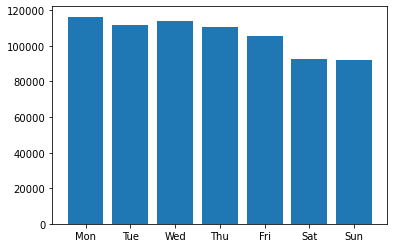

In [85]:
#2019
days19 = {"Mon":0,"Tue":0,"Wed":0,"Thu":0,"Fri":0,"Sat":0,"Sun":0}
for index, row in data2019.iterrows():
    day = row['day_of_week']
    if (day == "Monday"):
        days19["Mon"] = days19["Mon"] + 1
    elif (day == "Tuesday"):
        days19["Tue"] = days19["Tue"] + 1
    elif (day == "Wednesday"):
        days19["Wed"] = days19["Wed"] + 1
    elif (day == "Thursday"):
        days19["Thu"] = days19["Thu"] + 1
    elif (day == "Friday"):
        days19["Fri"] = days19["Fri"] + 1
    elif (day == "Saturday"):
        days19["Sat"] = days19["Sat"] + 1
    else:
        days19["Sun"] = days19["Sun"] + 1

keysDays19 = list(days19.keys())
valuesDays19 = list(days19.values())

plt.bar(keysDays19, valuesDays19)

<BarContainer object of 7 artists>

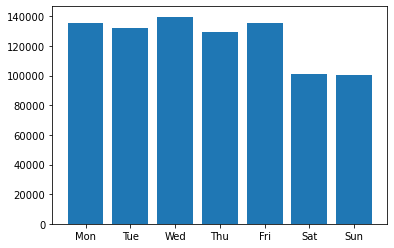

In [88]:
#2020
days20 = {"Mon":0,"Tue":0,"Wed":0,"Thu":0,"Fri":0,"Sat":0,"Sun":0}
for index, row in data2020.iterrows():
    day = row['day_of_week']
    if (day == "Monday"):
        days20["Mon"] = days20["Mon"] + 1
    elif (day == "Tuesday"):
        days20["Tue"] = days20["Tue"] + 1
    elif (day == "Wednesday"):
        days20["Wed"] = days20["Wed"] + 1
    elif (day == "Thursday"):
        days20["Thu"] = days20["Thu"] + 1
    elif (day == "Friday"):
        days20["Fri"] = days20["Fri"] + 1
    elif (day == "Saturday"):
        days20["Sat"] = days20["Sat"] + 1
    else:
        days20["Sun"] = days20["Sun"] + 1

keysDays20 = list(days20.keys())
valuesDays20 = list(days20.values())

plt.bar(keysDays20, valuesDays20)

<BarContainer object of 7 artists>

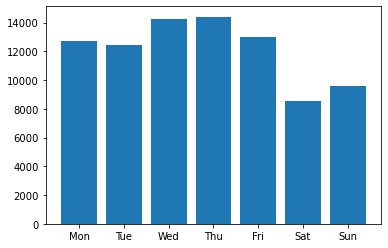

In [90]:
#2021
days21 = {"Mon":0,"Tue":0,"Wed":0,"Thu":0,"Fri":0,"Sat":0,"Sun":0}
for index, row in data2021.iterrows():
    day = row['day_of_week']
    if (day == "Monday"):
        days21["Mon"] = days21["Mon"] + 1
    elif (day == "Tuesday"):
        days21["Tue"] = days21["Tue"] + 1
    elif (day == "Wednesday"):
        days21["Wed"] = days21["Wed"] + 1
    elif (day == "Thursday"):
        days21["Thu"] = days21["Thu"] + 1
    elif (day == "Friday"):
        days21["Fri"] = days21["Fri"] + 1
    elif (day == "Saturday"):
        days21["Sat"] = days21["Sat"] + 1
    else:
        days21["Sun"] = days21["Sun"] + 1

keysDays21 = list(days21.keys())
valuesDays21 = list(days21.values())

plt.bar(keysDays21, valuesDays21)

In [93]:
valuesDays21

[12725, 12465, 14253, 14408, 12981, 8574, 9598]

<ipython-input-100-dfc90cc2f179>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


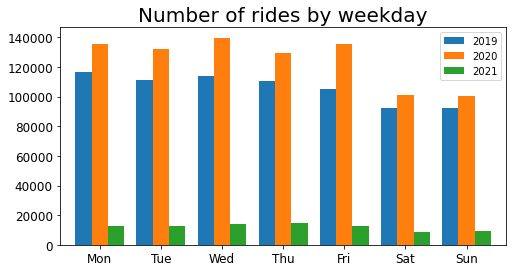

In [100]:
yearsWithUsagePerWeek = {
   '2019': [116362, 111474, 113768, 110847, 105489, 92326, 92293],
   '2020': [135261, 132092, 139774, 129400, 135836, 101164, 100505],
   '2021': [12725, 12465, 14253, 14408, 12981, 8574, 9598],
   'Weeks': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
}
dfYearsWithUsagePerWeek = pd.DataFrame(yearsWithUsagePerWeek)
ax = dfYearsWithUsagePerWeek.plot(x='Weeks',kind='bar', title="Number of rides by weekday", fontsize='large',figsize=(8,4), width=0.8)
ax.tick_params(axis='x', rotation=0)

ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('Weeks')
x_axis.label.set_visible(False)
ax1.title.set_size(20)

Text(0.5, 1.0, 'Number of rides by month in 2019')

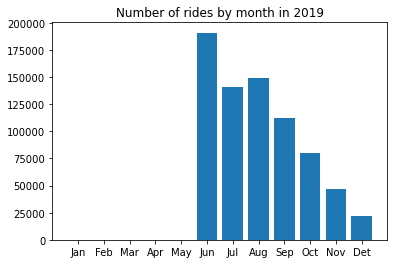

In [36]:
data2019['unlockedat'] = data2019['unlockedat'].astype(str)
months19 = {"Jan":0,"Feb":0,"Mar":0,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Det":0}
for index, row in data2019.iterrows():
    month = row['unlockedat'][5:7]
    if (month == "06"):
        months["Jun"] = months["Jun"] + 1
    elif (month == "07"):
        months["Jul"] = months["Jul"] + 1
    elif (month == "08"):
        months["Aug"] = months["Aug"] + 1
    elif (month == "09"):
        months["Sep"] = months["Sep"] + 1
    elif (month == "10"):
        months["Oct"] = months["Oct"] + 1
    elif (month == "11"):
        months["Nov"] = months["Nov"] + 1
    else:
        months["Det"] = months["Det"] + 1
        
keysMonths19 = list(months.keys())
valuesMonths19 = list(months.values())

plt.bar(keysMonths19,valuesMonths19)
plt.title("Number of rides by month in 2019")

Text(0.5, 1.0, 'Number of rides by month in 2020')

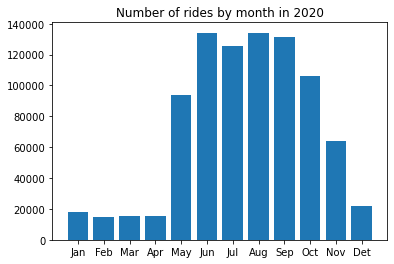

In [37]:
data2020['unlockedat'] = data2020['unlockedat'].astype(str)
months20 = {"Jan":0,"Feb":0,"Mar":0,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Det":0}
for index, row in data2020.iterrows():
    month = row['unlockedat'][5:7]
    if (month == "01"):
        months["Jan"] = months["Jan"] + 1
    elif (month == "02"):
        months["Feb"] = months["Feb"] + 1
    elif (month == "03"):
        months["Mar"] = months["Mar"] + 1
    elif (month == "04"):
        months["Apr"] = months["Apr"] + 1
    elif (month == "05"):
        months["May"] = months["May"] + 1
    elif (month == "06"):
        months["Jun"] = months["Jun"] + 1
    elif (month == "07"):
        months["Jul"] = months["Jul"] + 1
    elif (month == "08"):
        months["Aug"] = months["Aug"] + 1
    elif (month == "09"):
        months["Sep"] = months["Sep"] + 1
    elif (month == "10"):
        months["Oct"] = months["Oct"] + 1
    elif (month == "11"):
        months["Nov"] = months["Nov"] + 1
    else:
        months["Det"] = months["Det"] + 1
        
keysMonths20 = list(months.keys())
valuesMonths20 = list(months.values())

plt.bar(keysMonths20,valuesMonths20)
plt.title("Number of rides by month in 2020")

Text(0.5, 1.0, 'Number of rides by month in 2021')

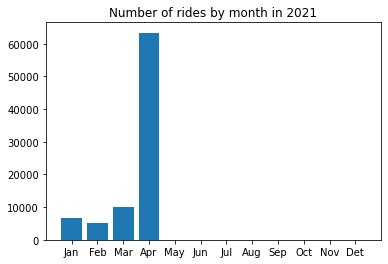

In [38]:
data2021['unlockedat'] = data2021['unlockedat'].astype(str)
months = {"Jan":0,"Feb":0,"Mar":0,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Det":0}
for index, row in data2021.iterrows():
    month = row['unlockedat'][5:7]
    if (month == "01"):
        months["Jan"] = months["Jan"] + 1
    elif (month == "02"):
        months["Feb"] = months["Feb"] + 1
    elif (month == "03"):
        months["Mar"] = months["Mar"] + 1
    else:
        months["Apr"] = months["Apr"] + 1
        
keysMonths21 = list(months.keys())
valuesMonths21 = list(months.values())

plt.bar(keysMonths21,valuesMonths21)
plt.title("Number of rides by month in 2021")



<ipython-input-84-488eb06464da>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


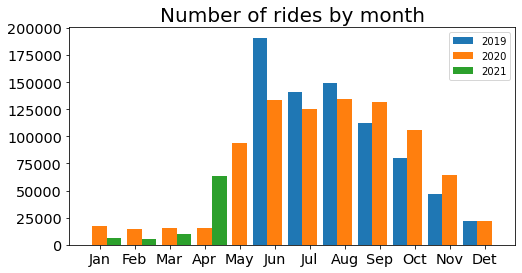

In [84]:
yearsWithUsagePerMonth = {
   '2019': [0, 0, 0, 0, 0, 191009, 140510, 149241, 112570, 80214, 47123, 21892],
   '2020': [17742,14497,15198,15379,94042,133988,125716,134145,131254,106032,64043,21996],
   '2021': [6582, 5006, 10065, 63351, 0, 0, 0, 0, 0, 0, 0, 0]
}
dfYearsWithUsagePerMonth = pd.DataFrame(yearsWithUsagePerMonth)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Det']
dfYearsWithUsagePerMonth['Months'] = months
ax = dfYearsWithUsagePerMonth.plot(x='Months',kind='bar', title="Number of rides by month", fontsize='x-large',figsize=(8,4),width=1.25)
ax.tick_params(axis='x', rotation=0)

ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('Months')
x_axis.label.set_visible(False)
ax1.title.set_size(20)